# Hierarchical Clustering Method

In [1]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
crime=pd.read_csv("C:\\Users\\DELL\\Desktop\\assignments\\crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.columns=['City','Murder','Assault','UrbanPop','Rape']

In [5]:
crime.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
# normaliation function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crime.iloc[:,1:])

In [9]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

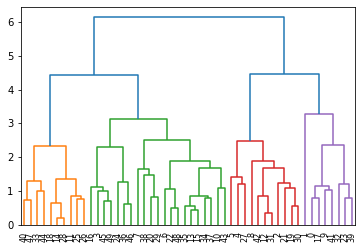

In [10]:
# create dendrogram
dendrogram=sch.dendrogram(sch.linkage(scaled_crime_df, method='complete'))


In [11]:
# crete clusters
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [12]:
#save clusters for chart
y_hc=hc.fit_predict(scaled_crime_df)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [13]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [14]:
clusters

,clusters
0,0
1,0
2,2
3,1
4,2
5,2
6,1
7,1
8,2
9,0


In [15]:
clusters.value_counts()

clusters
1           21
2           11
3           10
0            8
dtype: int64

In [16]:
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [17]:
crime['h_clusterid']=y_hc
crime

,City,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [18]:
crime.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


# Conclusion
1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

2 = Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

3 - As with murder and assault, also rates of rape and assault show clearer correlations

# K-Means Clustering

In [19]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


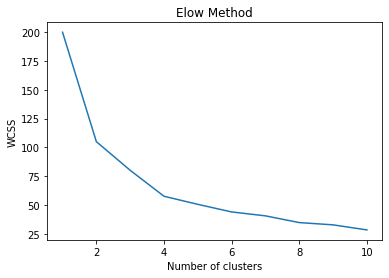

In [20]:
#WCSS (within cluster sum of squares)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# build clusters algorithm
from sklearn.cluster import KMeans
clusters_new=KMeans(4,random_state=0)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=0)

In [22]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [23]:
#assign clusters to the data set
crime['clusterid_new']=clusters_new.labels_

In [24]:
crime

,City,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,1,3
4,California,9.0,276,91,40.6,2,1
5,Colorado,7.9,204,78,38.7,2,1
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,0,3


In [25]:
crime.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'h_clusterid',
       'clusterid_new'],
      dtype='object')

In [26]:
crime['clusterid_new'].value_counts()

0    16
1    13
2    13
3     8
Name: clusterid_new, dtype: int64

In [27]:
crime.groupby('clusterid_new').mean()

,Murder,Assault,UrbanPop,Rape,h_clusterid
clusterid_new,,,,,
0,5.656250,138.875000,73.875000,18.781250,1.000000
1,10.815385,257.384615,76.000000,33.192308,1.769231
2,3.600000,78.538462,52.076923,12.176923,2.538462
3,13.937500,243.625000,53.750000,21.412500,0.125000


# DB SCAN Method Clustering

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
array=crime.values[:,1:]

In [30]:
array

array([[13.2, 236, 58, 21.2, 0, 3],
       [10.0, 263, 48, 44.5, 0, 1],
       [8.1, 294, 80, 31.0, 2, 1],
       [8.8, 190, 50, 19.5, 1, 3],
       [9.0, 276, 91, 40.6, 2, 1],
       [7.9, 204, 78, 38.7, 2, 1],
       [3.3, 110, 77, 11.1, 1, 0],
       [5.9, 238, 72, 15.8, 1, 0],
       [15.4, 335, 80, 31.9, 2, 1],
       [17.4, 211, 60, 25.8, 0, 3],
       [5.3, 46, 83, 20.2, 1, 0],
       [2.6, 120, 54, 14.2, 3, 2],
       [10.4, 249, 83, 24.0, 2, 1],
       [7.2, 113, 65, 21.0, 1, 0],
       [2.2, 56, 57, 11.3, 3, 2],
       [6.0, 115, 66, 18.0, 1, 0],
       [9.7, 109, 52, 16.3, 1, 2],
       [15.4, 249, 66, 22.2, 0, 3],
       [2.1, 83, 51, 7.8, 3, 2],
       [11.3, 300, 67, 27.8, 2, 1],
       [4.4, 149, 85, 16.3, 1, 0],
       [12.1, 255, 74, 35.1, 2, 1],
       [2.7, 72, 66, 14.9, 1, 2],
       [16.1, 259, 44, 17.1, 0, 3],
       [9.0, 178, 70, 28.2, 1, 1],
       [6.0, 109, 53, 16.4, 3, 2],
       [4.3, 102, 62, 16.5, 3, 2],
       [12.2, 252, 81, 46.0, 2, 1],
       [2.1, 57

In [31]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [32]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48362952,
         1.62086791],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48362952,
        -0.24219865],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.54873968,
        -0.24219865],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.46744492,
         1.62086791],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.54873968,
        -0.24219865],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.54873968,
        -0.24219865],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.46744492,
        -1.17373193],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.46744492,
        -1.17373193],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.54873968,
        -0.24219865],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48362952,
         1.62086791],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [33]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=4)

In [34]:
# Noisy samples are given the label -1
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  1, -1,  2,  1,  2, -1,
        0,  1, -1,  3, -1, -1, -1, -1,  1,  1, -1,  1,  3, -1, -1, -1,  1,
        2,  2,  2,  2,  3,  0,  1,  0, -1,  2,  1,  2,  2,  1, -1,  2],
      dtype=int64)

In [35]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [36]:
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,2
7,-1
8,-1
9,-1


In [37]:
pd.concat([crime,cl],axis=1)

,City,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,2,1,-1
3,Arkansas,8.8,190,50,19.5,1,3,-1
4,California,9.0,276,91,40.6,2,1,-1
5,Colorado,7.9,204,78,38.7,2,1,-1
6,Connecticut,3.3,110,77,11.1,1,0,2
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,2,1,-1
9,Georgia,17.4,211,60,25.8,0,3,-1


 -1 represents outliers, and forms four clusters